**CNN model**

In [ ]:
from google.colab import drive
import pandas as pd


# Montage de Google Drive pour accéder aux fichiers
drive.mount('/content/drive')

# Chemin d'accès au fichier CSV
file_path = "/content/drive/My Drive/tor_dataset/tor_nontor_2.csv"

Mounted at /content/drive


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,53913,80,6,435,0.0,4.597701e+03,435.0,0.0,435,435,...,0,0,0,0,0,0,0,0,0,0
1,53913,80,6,259,0.0,7.722008e+03,259.0,0.0,259,259,...,0,0,0,0,0,0,0,0,0,0
2,53913,80,6,891,0.0,2.244669e+03,891.0,0.0,891,891,...,0,0,0,0,0,0,0,0,0,0
3,53913,80,6,1074,0.0,1.862197e+03,1074.0,0.0,1074,1074,...,0,0,0,0,0,0,0,0,0,0
4,53913,80,6,315,0.0,6.349206e+03,315.0,0.0,315,315,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84182,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
84183,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
84184,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
84185,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ["Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]

# Supprimer les colonnes spécifiées
data = data.drop(colonnes_a_supprimer, axis=1)

In [ ]:
data

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,label
0,53913,80,6,435,0.0,4.597701e+03,435.0,0.0,435,435,0.0,0.0,0,0,0.0,0.0,0,0,0
1,53913,80,6,259,0.0,7.722008e+03,259.0,0.0,259,259,0.0,0.0,0,0,0.0,0.0,0,0,0
2,53913,80,6,891,0.0,2.244669e+03,891.0,0.0,891,891,0.0,0.0,0,0,0.0,0.0,0,0,0
3,53913,80,6,1074,0.0,1.862197e+03,1074.0,0.0,1074,1074,0.0,0.0,0,0,0.0,0.0,0,0,0
4,53913,80,6,315,0.0,6.349206e+03,315.0,0.0,315,315,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84182,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,1.0,0.0,1,1,0.0,0.0,0,0,0
84183,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,1.0,0.0,1,1,0.0,0.0,0,0,0
84184,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,1.0,0.0,1,1,0.0,0.0,0,0,0
84185,138,138,17,1,475000000.0,2.000000e+06,1.0,0.0,1,1,1.0,0.0,1,1,0.0,0.0,0,0,0


In [ ]:
data['label'].value_counts()

label
0    69680
1    14507
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Séparez les classes
data_majority = data[data.label == 0]
data_minority = data[data.label == 1]

# Sous-échantillonnez la classe majoritaire
data_majority_undersampled = resample(data_majority,
                                      replace=False,    # échantillonnage sans remplacement
                                      n_samples=len(data_minority),     # pour correspondre à la classe minoritaire
                                      random_state=42) # pour la reproductibilité

# Combinez les classes minoritaire et sous-échantillonnée
balanced_train_data = pd.concat([data_majority_undersampled, data_minority])

# Mélangez les lignes du dataframe équilibré
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_train_data

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,label
0,443,49580,6,4975732,32519.034385,88.831151,11282.839002,1.418286e+04,77333,8,1.990293e+04,1.400487e+04,77333,8,26104.078947,16110.142352,98276,80,1
1,36922,443,6,4713928,136155.876797,184.347321,5430.792627,2.434715e+04,180364,6,9.371626e+03,3.475821e+04,218297,7,12838.112637,39863.433789,213210,6,1
2,55139,443,6,4970387,25056.801412,62.168197,16137.620130,1.955810e+04,107209,48,3.627885e+04,2.668958e+04,109154,120,29143.358824,21935.832335,107209,166,1
3,43731,443,6,2504088,433.690829,1.597388,834696.000000,1.445656e+06,2503996,37,1.252044e+06,1.770605e+06,2504051,37,0.000000,0.000000,0,0,1
4,58167,443,6,3317663,982.016558,3.617004,301605.727273,6.412378e+05,2018652,36,5.528877e+05,8.098359e+05,2018777,855,787718.000000,933459.872004,2018787,1017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29009,55139,443,6,4970008,30273.794328,76.861043,13044.640420,1.714738e+04,90788,9,2.975948e+04,2.134934e+04,103436,46,23332.558685,19867.381423,91493,9,1
29010,443,61417,17,24489,19110.621095,81.669321,24489.000000,0.000000e+00,24489,24489,0.000000e+00,0.000000e+00,0,0,0.000000,0.000000,0,0,0
29011,55553,443,6,3134798,3286.655153,18.820989,54048.241379,2.744105e+05,2082272,1,1.295705e+05,4.275712e+05,2107422,1,94232.363636,366371.277541,2107961,4,0
29012,58167,443,6,1367746,2382.021223,8.773559,124340.545455,1.931351e+05,513413,38,2.735492e+05,2.056749e+05,513413,576,273500.000000,205734.960494,513635,462,1


In [ ]:
balanced_train_data['label'].value_counts()

label
1    14507
0    14507
Name: count, dtype: int64

In [ ]:
y = balanced_train_data.pop("label")

In [ ]:
X = balanced_train_data

In [ ]:
# Diviser la dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, BatchNormalization
from keras.regularizers import l2

In [ ]:
# Créer une couche d'entrée
input_val = Input(shape=(X_train.shape[1], 1))

# Créer les couches Convolution 1D avec dropout
conv1 = Conv1D(100, kernel_size=3, activation='relu')(input_val)
dropout1_conv = Dropout(0.05)(conv1)  # Dropout après la première couche de convolution
pool1 = MaxPooling1D(pool_size=2)(dropout1_conv)

conv2 = Conv1D(250, kernel_size=3, activation='relu')(pool1)
dropout2_conv = Dropout(0.05)(conv2)  # Dropout après la deuxième couche de convolution
pool2 = MaxPooling1D(pool_size=2)(dropout2_conv)

conv3 = Conv1D(500, kernel_size=3, activation='relu')(pool2)
dropout3_conv = Dropout(0.5)(conv3)  # Dropout après la troisième couche de convolution
pool3 = MaxPooling1D(pool_size=1)(dropout3_conv)

# Aplatir la sortie pour la couche Dense
flatten = Flatten()(pool3)

# Ajouter des couches Dense pour la classification
dense1 = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(flatten)
dropout1 = Dropout(0.1)(dense1)  # Dropout pour la régularisation

dense2 = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(dropout1)
dropout2 = Dropout(0.1)(dense2)  # Dropout pour la régularisation

output = Dense(1, activation='sigmoid')(dropout2)  # Couche de sortie binaire

# Créer le modèle en spécifiant les entrées et les sorties
model = Model(input_val, output)

In [ ]:
from keras.optimizers import Adam

In [ ]:

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,Callback
from keras.callbacks import ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Entraîner le modèle
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=500,
                    batch_size=32,
                    callbacks=[early_stopping],
                    shuffle=True,
                    verbose=1)

Epoch 1/500
653/653 [==============================] - 16s 20ms/step - loss: 0.2832 - accuracy: 0.8795 - val_loss: 0.2173 - val_accuracy: 0.9092
Epoch 2/500
653/653 [==============================] - 13s 20ms/step - loss: 0.2288 - accuracy: 0.9052 - val_loss: 0.2320 - val_accuracy: 0.9077
Epoch 3/500
653/653 [==============================] - 13s 20ms/step - loss: 0.2184 - accuracy: 0.9121 - val_loss: 0.2105 - val_accuracy: 0.9179
Epoch 4/500
653/653 [==============================] - 12s 18ms/step - loss: 0.2077 - accuracy: 0.9166 - val_loss: 0.1833 - val_accuracy: 0.9209
Epoch 5/500
653/653 [==============================] - 12s 18ms/step - loss: 0.1920 - accuracy: 0.9214 - val_loss: 0.1769 - val_accuracy: 0.9209
Epoch 6/500
653/653 [==============================] - 14s 21ms/step - loss: 0.1806 - accuracy: 0.9262 - val_loss: 0.1521 - val_accuracy: 0.9361
Epoch 7/500
653/653 [==============================] - 14s 21ms/step - loss: 0.1714 - accuracy: 0.9298 - val_loss: 0.1576 - val_ac

In [ ]:
import matplotlib.pyplot as plt

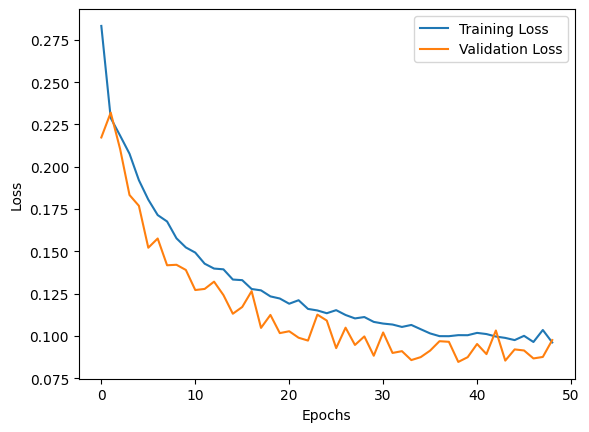

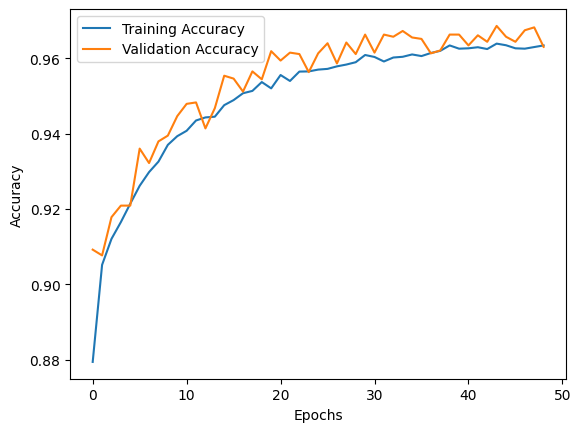

In [ ]:
# Plot loss and accuracy curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
scaler.fit(X_test)

MinMaxScaler()

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# Évaluer le modèle sur les données de test
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

91/91 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9583
Test Loss: 0.11492718756198883
Test Accuracy: 0.9583046436309814


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

91/91 [==============================] - 1s 5ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

In [ ]:
import seaborn as sns

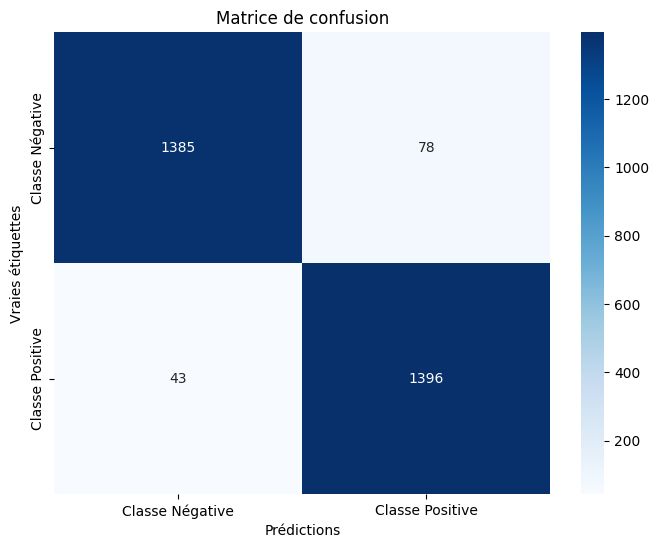

In [ ]:
# Tracer la matrice de confusion sous forme de heatmap
classes = ["Classe Négative", "Classe Positive"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

**cross validation**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, BatchNormalization
from keras.regularizers import l2

In [ ]:
# Créer une couche d'entrée
input_val = Input(shape=(X_train.shape[1], 1))

# Créer les couches Convolution 1D avec dropout
conv1 = Conv1D(100, kernel_size=3, activation='relu')(input_val)
dropout1_conv = Dropout(0.05)(conv1)  # Dropout après la première couche de convolution
pool1 = MaxPooling1D(pool_size=2)(dropout1_conv)

conv2 = Conv1D(250, kernel_size=3, activation='relu')(pool1)
dropout2_conv = Dropout(0.05)(conv2)  # Dropout après la deuxième couche de convolution
pool2 = MaxPooling1D(pool_size=2)(dropout2_conv)

conv3 = Conv1D(500, kernel_size=3, activation='relu')(pool2)
dropout3_conv = Dropout(0.05)(conv3)  # Dropout après la troisième couche de convolution
pool3 = MaxPooling1D(pool_size=1)(dropout3_conv)

# Aplatir la sortie pour la couche Dense
flatten = Flatten()(pool3)

# Ajouter des couches Dense pour la classification
dense1 = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(flatten)
dropout1 = Dropout(0.1)(dense1)  # Dropout pour la régularisation

dense2 = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(dropout1)
dropout2 = Dropout(0.1)(dense2)  # Dropout pour la régularisation

output = Dense(1, activation='sigmoid')(dropout2)  # Couche de sortie binaire

# Créer le modèle en spécifiant les entrées et les sorties
model = Model(input_val, output)

In [ ]:
# Importe les bibliothèques nécessaires
from keras.models import Model

# Crée une fonction qui retourne ton modèle
def create_model():
    # Créer le modèle en spécifiant les entrées et les sorties
    model_1 = Model(input_val, output)
    return model

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
n_splits = 7  # Nombre de plis pour la validation croisée
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

In [ ]:
# Liste pour stocker les métriques d'entraînement et de validation
all_train_acc = []
all_val_acc = []
all_train_loss = []
all_val_loss = []
cv_scores = []
# Liste pour stocker les précisions de validation croisée
cv_accuracies = []

In [ ]:
import numpy as np
Y_train_1 = np.array(y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Boucle sur les plis de la validation croisée
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = Y_train_1[train_index], Y_train_1[val_index]

    # Instancier et compiler le modèle
    model_1 = create_model()  # Remplacez create_model() par votre fonction de création de modèle
    model_1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle sur l'ensemble d'entraînement
    history_1 = model_1.fit(X_train_fold, y_train_fold, epochs=500,callbacks=[early_stopping], validation_data=(X_val_fold, y_val_fold), verbose=1)

    # Évaluer le modèle sur l'ensemble de validation croisée
    score_1 = model_1.evaluate(X_val_fold, y_val_fold, verbose=1)
    cv_scores.append(score_1)

    # Prédire les étiquettes pour l'ensemble de validation
    y_pred_fold = model.predict(X_val_fold)
    y_pred_fold_binary = (y_pred_fold > 0.5).astype(int)

    # Calculer l'exactitude pour ce pli
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold_binary)
    cv_accuracies.append(accuracy_fold)

Epoch 1/500
700/700 [==============================] - 20s 27ms/step - loss: 0.2840 - accuracy: 0.8942 - val_loss: 0.2151 - val_accuracy: 0.9188
Epoch 2/500
700/700 [==============================] - 20s 29ms/step - loss: 0.2120 - accuracy: 0.9175 - val_loss: 0.1937 - val_accuracy: 0.9212
Epoch 3/500
700/700 [==============================] - 19s 27ms/step - loss: 0.1890 - accuracy: 0.9272 - val_loss: 0.1713 - val_accuracy: 0.9335
Epoch 4/500
700/700 [==============================] - 20s 28ms/step - loss: 0.1706 - accuracy: 0.9323 - val_loss: 0.1485 - val_accuracy: 0.9461
Epoch 5/500
700/700 [==============================] - 19s 27ms/step - loss: 0.1586 - accuracy: 0.9383 - val_loss: 0.1448 - val_accuracy: 0.9445
Epoch 6/500
700/700 [==============================] - 20s 29ms/step - loss: 0.1512 - accuracy: 0.9414 - val_loss: 0.1396 - val_accuracy: 0.9496
Epoch 7/500
700/700 [==============================] - 19s 27ms/step - loss: 0.1433 - accuracy: 0.9462 - val_loss: 0.1426 - val_ac

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
scaler.fit(X_test)

MinMaxScaler()

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# Évaluer le modèle sur les données de test
score = model_1.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

91/91 [==============================] - 1s 6ms/step - loss: 0.0574 - accuracy: 0.9814
Test Loss: 0.057430628687143326
Test Accuracy: 0.9813921451568604


In [ ]:
import numpy as np

# Trouver les indices des exemples positifs et négatifs
indices_positifs = np.where(y_test == 1)[0]  # Indices des exemples positifs
indices_negatifs = np.where(y_test == 0)[0]  # Indices des exemples négatifs

# Sélectionner 5 exemples positifs et 5 exemples négatifs à partir des données de test
indices_5_positifs = indices_positifs[:5]
indices_5_negatifs = indices_negatifs[:5]

# Sélectionner les exemples à partir des indices
exemples_5_positifs = X_test[indices_5_positifs]
exemples_5_negatifs = X_test[indices_5_negatifs]

# Reshape si nécessaire pour correspondre à la dimension d'entrée du modèle
exemples_5_positifs = exemples_5_positifs.reshape((5, -1))  # Adapter selon les dimensions attendues
exemples_5_negatifs = exemples_5_negatifs.reshape((5, -1))  # Adapter selon les dimensions attendues

# Prédire les probabilités pour chaque exemple
probas_5_positifs = model.predict(exemples_5_positifs)
probas_5_negatifs = model.predict(exemples_5_negatifs)

# Afficher les probabilités prédites pour chaque exemple positif
print("Probabilités pour les exemples positifs :")
for i in range(5):
    print(f'Exemple positif {i+1} - Probabilité: {probas_5_positifs[i][0]}')

# Afficher les probabilités prédites pour chaque exemple négatif
print("\nProbabilités pour les exemples négatifs :")
for i in range(5):
    print(f'Exemple négatif {i+1} - Probabilité: {probas_5_negatifs[i][0]}')

1/1 [==============================] - 0s 18ms/step
Probabilités pour les exemples positifs :
Exemple positif 1 - Probabilité: 0.9813833832740784
Exemple positif 2 - Probabilité: 0.9950857758522034
Exemple positif 3 - Probabilité: 0.9560171961784363
Exemple positif 4 - Probabilité: 0.9902819395065308
Exemple positif 5 - Probabilité: 0.9908117651939392

Probabilités pour les exemples négatifs :
Exemple négatif 1 - Probabilité: 6.095507387726684e-08
Exemple négatif 2 - Probabilité: 1.204105354208161e-24
Exemple négatif 3 - Probabilité: 0.0
Exemple négatif 4 - Probabilité: 2.3391995263542797e-13
Exemple négatif 5 - Probabilité: 0.04700888320803642


In [ ]:
import pandas as pd

# Définir le format de flottant pour le DataFrame
pd.options.display.float_format = '{:.2f}%'.format

# Créer une liste pour stocker les données
data = []

# Ajouter les résultats pour les exemples positifs
for i in range(5):
    data.append({'Exemple': f'Exemple positif {i+1}', 'Classe': 'Positif', 'Probabilité': probas_5_positifs[i][0] * 100})

# Ajouter les résultats pour les exemples négatifs
for i in range(5):
    data.append({'Exemple': f'Exemple négatif {i+1}', 'Classe': 'Négatif', 'Probabilité': probas_5_negatifs[i][0] * 100})

# Créer un DataFrame pandas à partir de la liste de données
tab = pd.DataFrame(data)

# Afficher le tableau de données
print(tab)


             Exemple   Classe  Probabilité
0  Exemple positif 1  Positif       98.14%
1  Exemple positif 2  Positif       99.51%
2  Exemple positif 3  Positif       95.60%
3  Exemple positif 4  Positif       99.03%
4  Exemple positif 5  Positif       99.08%
5  Exemple négatif 1  Négatif        0.00%
6  Exemple négatif 2  Négatif        0.00%
7  Exemple négatif 3  Négatif        0.00%
8  Exemple négatif 4  Négatif        0.00%
9  Exemple négatif 5  Négatif        4.70%


In [ ]:
tab

,Exemple,Classe,Probabilité
0,Exemple positif 1,Positif,98.14%
1,Exemple positif 2,Positif,99.51%
2,Exemple positif 3,Positif,95.60%
3,Exemple positif 4,Positif,99.03%
4,Exemple positif 5,Positif,99.08%
5,Exemple négatif 1,Négatif,0.00%
6,Exemple négatif 2,Négatif,0.00%
7,Exemple négatif 3,Négatif,0.00%
8,Exemple négatif 4,Négatif,0.00%
9,Exemple négatif 5,Négatif,4.70%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

91/91 [==============================] - 0s 4ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

In [ ]:
import seaborn as sns

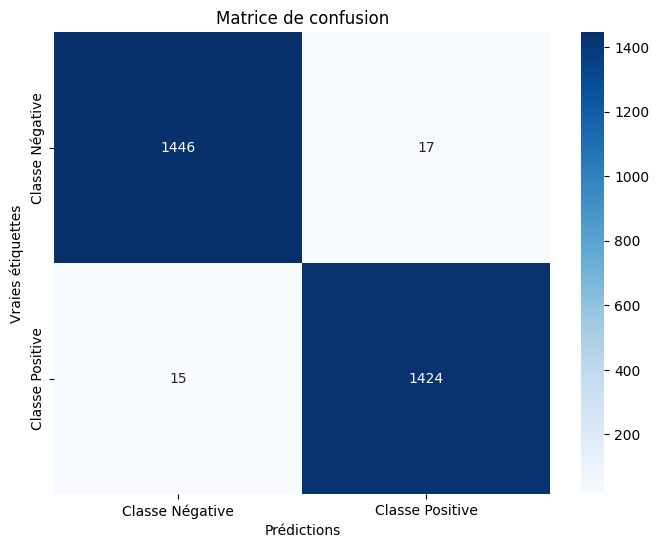

In [ ]:
# Tracer la matrice de confusion sous forme de heatmap
classes = ["Classe Négative", "Classe Positive"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(y_test, y_pred_binary)

In [ ]:
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred_binary)

In [ ]:
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.988973121984838


In [ ]:
# 1. Prédictions sur l'ensemble de test
print("Prédictions sur l'ensemble de test :")
print(y_pred)


# 3. Précision, rappel et F1-score
print("\nPrécision : ", precision)
print("Rappel : ", recall)
print("F1-score : ", f1)

# 4. Courbe ROC et AUC
print("\nAUC : ", auc)

Prédictions sur l'ensemble de test :
[[9.9798566e-01]
 [1.8258314e-30]
 [9.9132359e-01]
 ...
 [9.9798566e-01]
 [9.7150606e-01]
 [9.9455458e-01]]

Précision :  0.9882026370575989
Rappel :  0.9895760945100764
F1-score :  0.9888888888888889

AUC :  0.9889780677608482


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

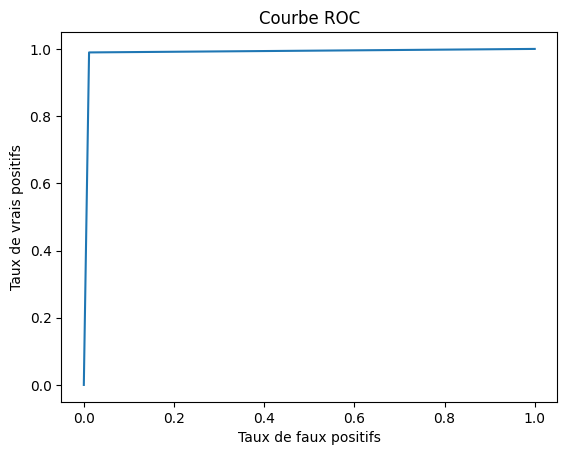

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
plt.plot(fpr, tpr)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

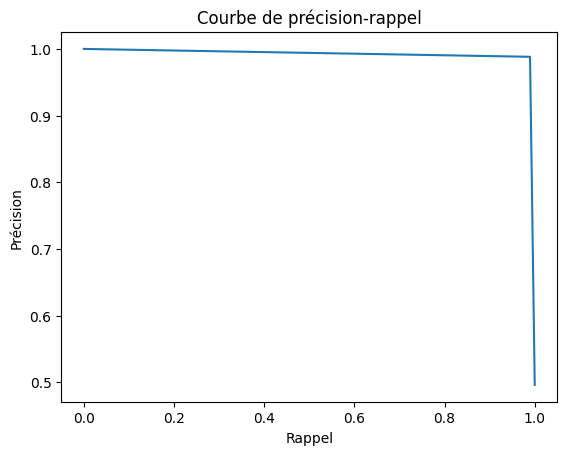

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_binary)
plt.plot(recall, precision)
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe de précision-rappel')
plt.show()

In [ ]:
from sklearn.calibration import calibration_curve

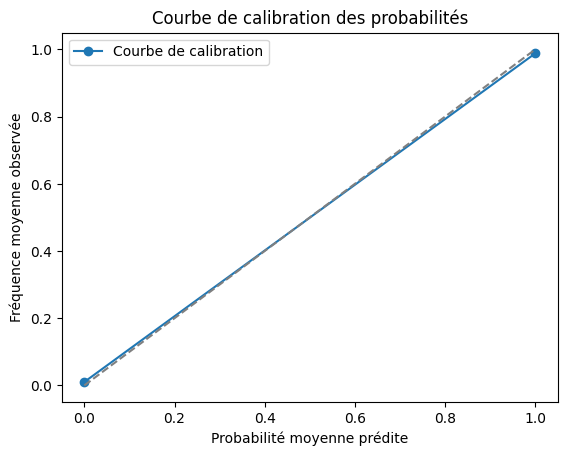

In [ ]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_binary, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Courbe de calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Probabilité moyenne prédite')
plt.ylabel('Fréquence moyenne observée')
plt.title('Courbe de calibration des probabilités')
plt.legend()
plt.show()

**cross validation résult **

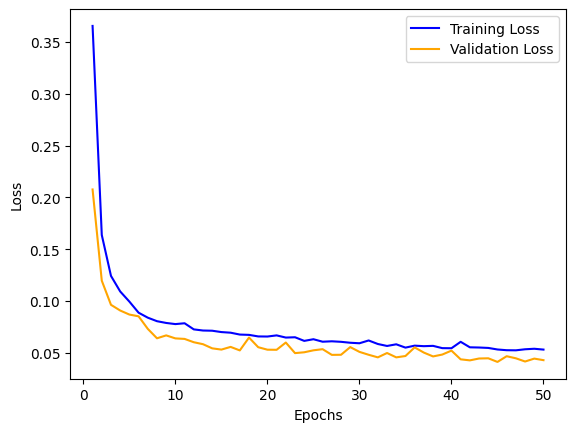

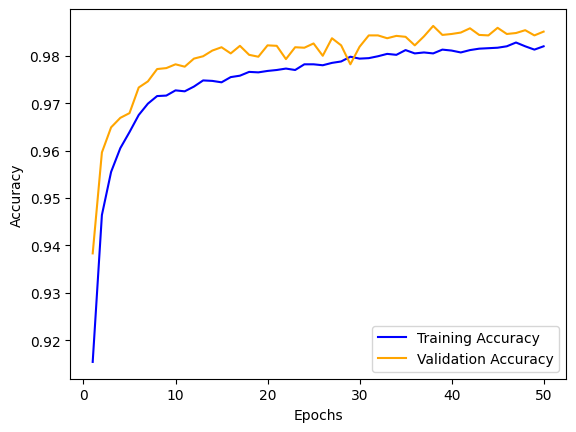

In [ ]:
# Loss
plt.plot(total_epochs, loss, 'b-', label='Training Loss')  # Bleu pour la perte d'entraînement
plt.plot(total_epochs, val_loss, 'orange', label='Validation Loss')  # Orange pour la perte de validation

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(total_epochs, accuracy, 'b-', label='Training Accuracy')  # Bleu pour la précision d'entraînement
plt.plot(total_epochs, val_accuracy, 'orange', label='Validation Accuracy')  # Orange pour la précision de validation

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()







